In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal.windows import blackman

In [2]:
values = np.loadtxt("twoFreqs_values.out",dtype=float)

cnn_preds = np.loadtxt("twoFreqs_cnn2d_pred_results.out",dtype=float)
lstm_preds = np.loadtxt("twoFreqs_lstm_pred_results.out",dtype=float)
cnn_lstm_withAttention_preds = np.loadtxt("twoFreqs_cnn2d+lstm_pred_results.out",dtype=float)
cnn_lstm_withoutAttention_preds = np.loadtxt("twoFreqs_cnn2d+lstm_withoutAttention_pred_results.out",dtype=float)

In [3]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

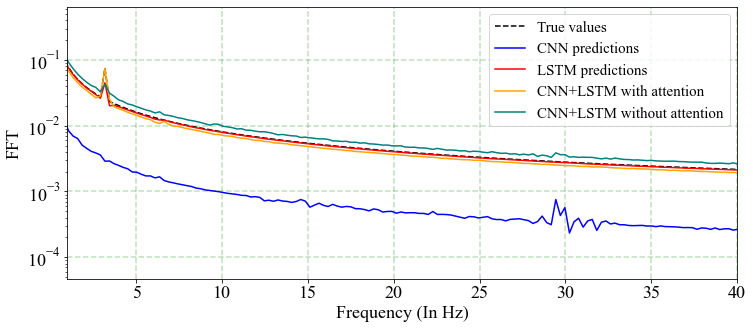

In [4]:
#### Fourier transform of the different predictions ####

N = len(values)
w = blackman(N)
T = math.pi/600
xf = fftfreq(N,T)

y_val = fft(values)
y_cnn = fft(cnn_preds)
y_lstm = fft(lstm_preds)
y_cnn_lstm_wAttention = fft(cnn_lstm_withAttention_preds)
y_cnn_lstm = fft(cnn_lstm_withoutAttention_preds)

plt.figure(figsize=[12,5])
plt.rcParams.update({'font.size': 18})
                    
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_val[1:N//2]),'--',color='black',linewidth=1.5)
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_cnn[1:N//2]),'-',color='blue')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_lstm[1:N//2]),'-',color='red')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_cnn_lstm_wAttention[1:N//2]),'-',color='orange')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_cnn_lstm[1:N//2]),'-',color='teal')
plt.xlim([1,40])
plt.xlabel('Frequency (In Hz)')
plt.ylabel('FFT')
plt.legend(['True values','CNN predictions','LSTM predictions','CNN+LSTM with attention','CNN+LSTM without attention'],fontsize=15)
plt.grid(color = 'green', linestyle = '--', linewidth = 1.5, alpha=0.25)
plt.savefig("Comparisons of frequencies.png", dpi = 600)
plt.show()

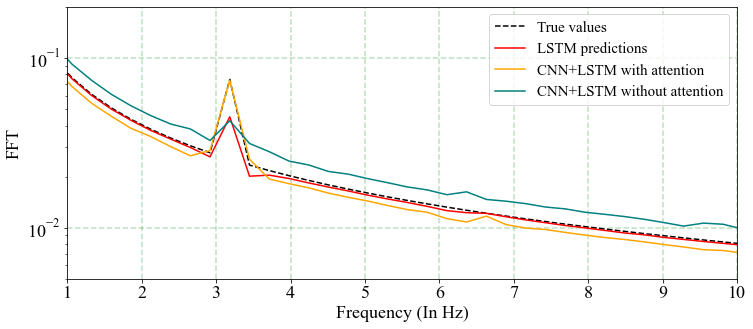

In [5]:
#### Fourier transform of the different predictions ####

N = len(values)
w = blackman(N)
T = math.pi/600
xf = fftfreq(N,T)

y_val = fft(values)
y_cnn = fft(cnn_preds)
y_lstm = fft(lstm_preds)
y_cnn_lstm_wAttention = fft(cnn_lstm_withAttention_preds)
y_cnn_lstm = fft(cnn_lstm_withoutAttention_preds)

plt.figure(figsize=[12,5])
plt.rcParams.update({'font.size': 18})
                    
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_val[1:N//2]),'--',color='black',linewidth=1.5)
#plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_cnn[1:N//2]),'-',color='blue')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_lstm[1:N//2]),'-',color='red')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_cnn_lstm_wAttention[1:N//2]),'-',color='orange')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(y_cnn_lstm[1:N//2]),'-',color='teal')
plt.xlim([1,10])
plt.ylim([5*10e-4,2*10e-2])
plt.xlabel('Frequency (In Hz)')
plt.ylabel('FFT')
plt.legend(['True values','LSTM predictions','CNN+LSTM with attention','CNN+LSTM without attention'],fontsize=15)
plt.grid(color = 'green', linestyle = '--', linewidth = 1.5, alpha=0.25)
plt.savefig("Comparisons of frequencies_zoomed.png", dpi = 600)
plt.show()